Working on applying:<br>
https://colab.research.google.com/drive/1nXOlrmVHqCHiixqiMF6H8LSciz583_W2

To:<br>
https://opendata.stackexchange.com/questions/7807/where-can-i-find-automobile-insurance-claims-data-set <br>

http://dyzz9obi78pm5.cloudfront.net/app/image/id/560ec66d32131c9409f2ba54/n/Auto_Insurance_Claims_Sample.csv

On local mac:<br>
Use the myenv virtualenvironment in /Users/Ash

In [17]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams['figure.figsize'] = [10, 10]

In [30]:
df = pd.read_csv('Auto_Insurance_Claims_Sample.csv')
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [9]:
df.columns.map(print)

Customer
Country
State Code
State
Claim Amount
Response
Coverage
Education
Effective To Date
EmploymentStatus
Gender
Income
Location Code
Marital Status
Monthly Premium Auto
Months Since Last Claim
Months Since Policy Inception
Number of Open Complaints
Number of Policies
Policy Type
Policy
Claim Reason
Sales Channel
Total Claim Amount
Vehicle Class
Vehicle Size


Index([None, None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None, None,
       None, None],
      dtype='object')

In [27]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

### For now just consider numerical features

In [28]:
df2 = df.select_dtypes(include=['int64', 'float64'])

In [31]:
df2.head(25)

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,276.351928,56274,69,32,5,0,1,384.811147
1,697.953590,0,94,13,42,0,8,1131.464935
2,1288.743165,48767,108,18,38,0,2,566.472247
3,764.586183,0,106,18,65,0,7,529.881344
4,281.369258,43836,73,12,44,0,1,138.130879
5,825.629780,62902,69,14,94,0,2,159.383042
6,538.089864,55350,67,0,13,0,9,321.600000
7,721.610031,0,101,0,68,0,4,363.029680
8,2412.750402,14072,71,13,3,0,2,511.200000
9,738.817808,28812,93,17,7,0,8,425.527834


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x144e5db38>,
      dtype=object)

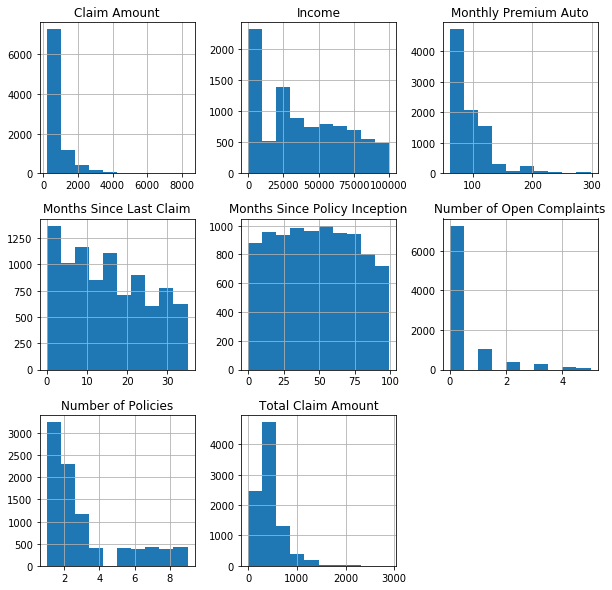

In [32]:
df2.hist()

### Choose a single feature to look at (just like example)

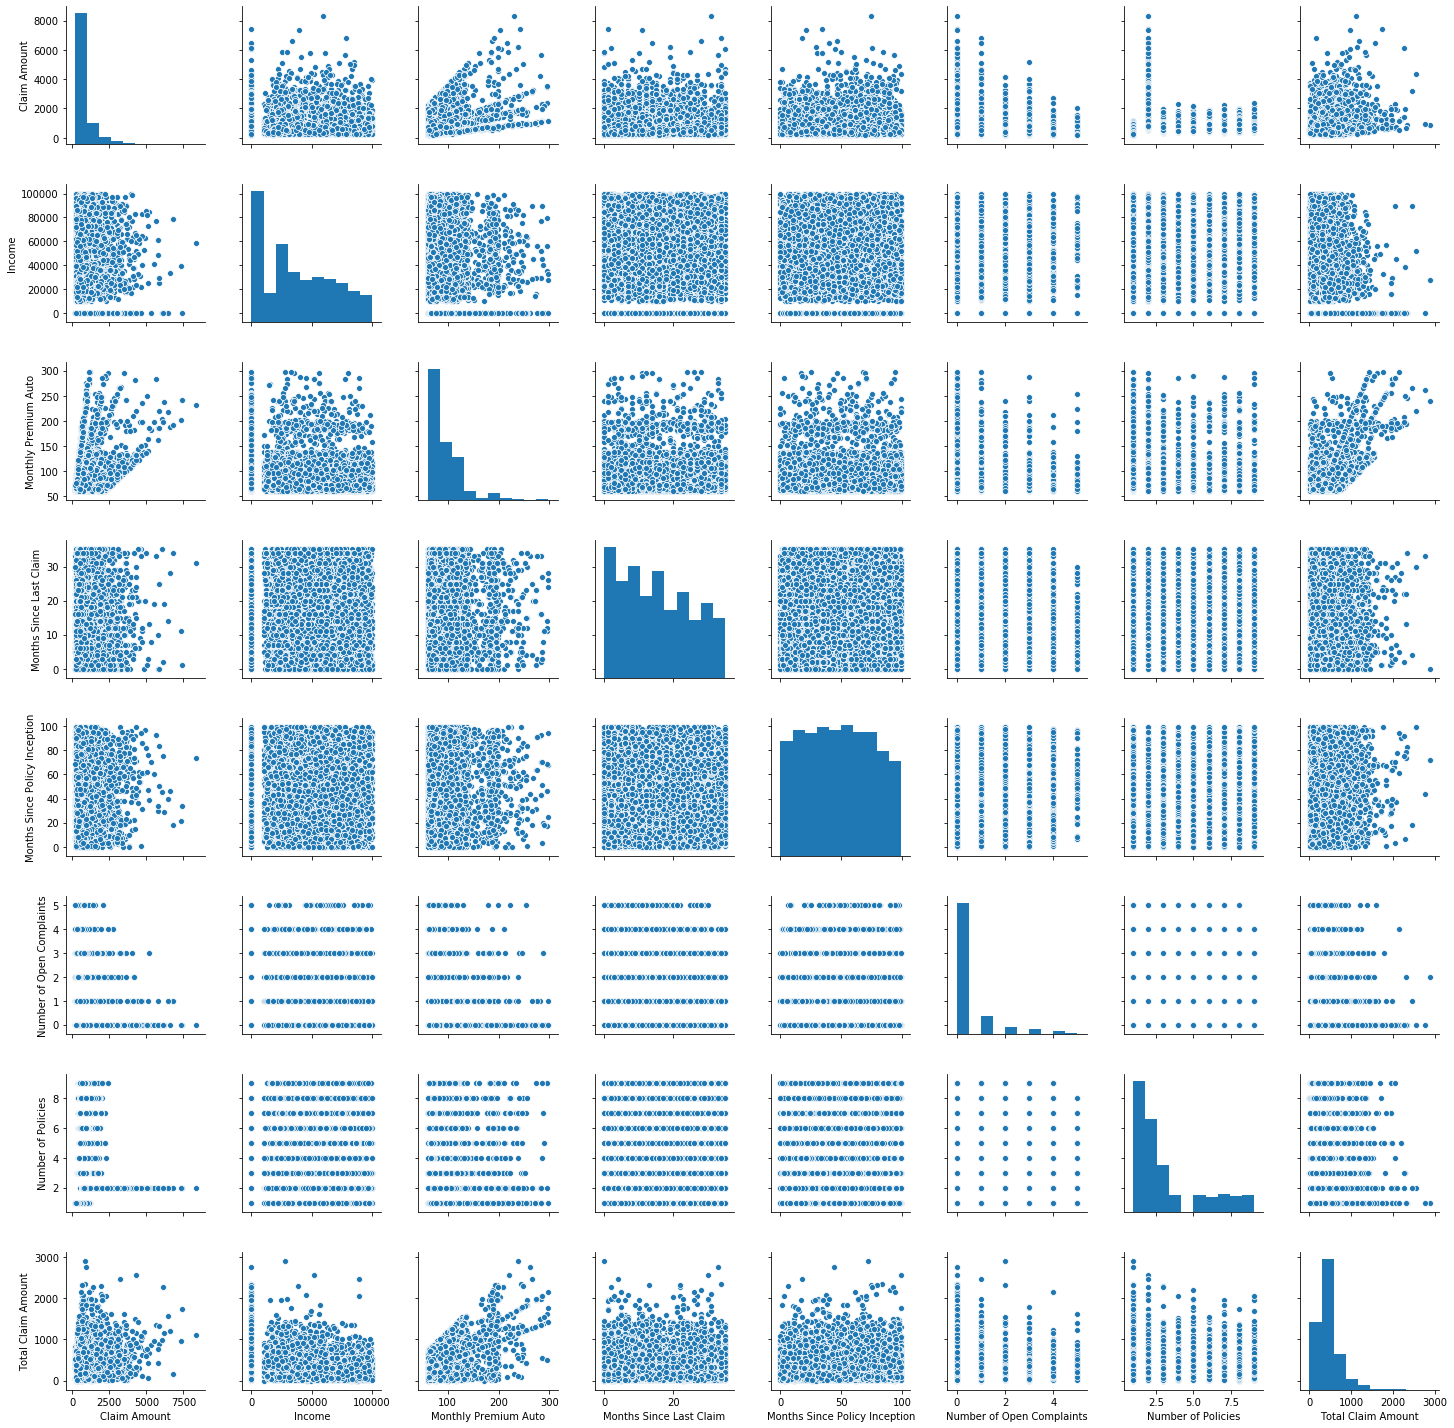

In [34]:
sns.pairplot(df2)

Looks like 'Monthly Premium Auto' has the best relationship - so go with this.

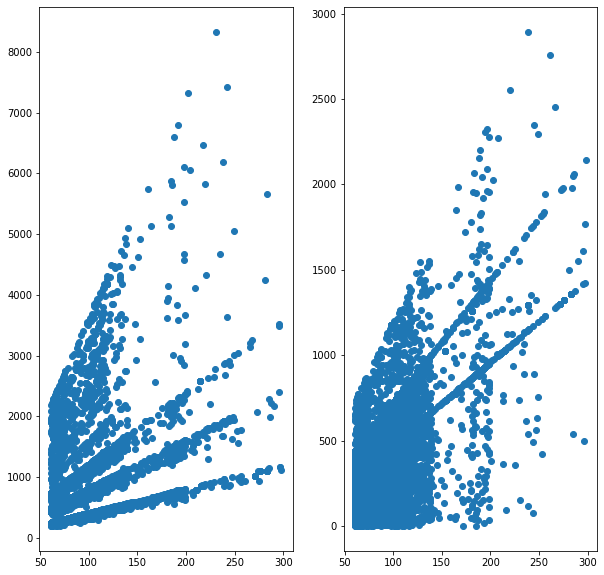

In [44]:
fig, axes = plt.subplots(1,2)
axes[0].scatter( df2['Monthly Premium Auto'], df2['Claim Amount'] )
axes[1].scatter( df2['Monthly Premium Auto'], df2['Total Claim Amount'] )

Probably the total claim amount field is going to be best to trial quantile regression.

In [130]:
dff = df[['Monthly Premium Auto', 'Total Claim Amount']]
dff.rename({
    'Monthly Premium Auto': 'premium',
    'Total Claim Amount': 'claim'
    }, inplace=True, axis=1)
dff.head()

/Users/Ash/myenv/lib/python3.7/site-packages/pandas/core/frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,premium,claim
0,69,384.811147
1,94,1131.464935
2,108,566.472247
3,106,529.881344
4,73,138.130879


In [131]:
mean = dff.premium.mean(axis=0)
std = dff.premium.std(axis=0)
dff['premium_norm'] = (dff.premium - mean) / std

/Users/Ash/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
dff.head()

,premium,claim,premium_norm
0,69,384.811147,-0.703886
1,94,1131.464935,0.022690
2,108,566.472247,0.429572
3,106,529.881344,0.371446
4,73,138.130879,-0.587634


### RF Quantile Regression

In [133]:
X_train = pd.DataFrame({
    'const': [1 for _ in range(len(dff))],
    'premium': dff.premium_norm.values
    })

train_labels = dff.claim.values

In [134]:
X_train.head()

,const,premium
0,1,-0.703886
1,1,0.022690
2,1,0.429572
3,1,0.371446
4,1,-0.587634


In [135]:
train_labels

array([ 384.811147, 1131.464935,  566.472247, ...,  790.784983,
        691.2     ,  369.6     ])

In [136]:
train_labels.shape

(9134,)

In [137]:
X_train.shape

(9134, 2)

In [138]:
QUANTILES = [0.1, 0.3, 0.5, 0.7, 0.9]

In [139]:
from sklearn import ensemble
N_ESTIMATORS = 1000
rf = ensemble.RandomForestRegressor(n_estimators=N_ESTIMATORS, 
                                    min_samples_leaf=1, random_state=3, 
                                    verbose=True, 
                                    n_jobs=-1)  # Use maximum number of cores.
rf.fit(X_train, train_labels)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=3, verbose=True,
                      warm_start=False)

In [140]:
def rf_quantile(m, X, q):
    rf_preds = []
    for estimator in m.estimators_:
        rf_preds.append(estimator.predict(X))
    rf_preds = np.array(rf_preds).transpose()  # One row per record.
    return np.percentile(rf_preds, q * 100, axis=1)

In [141]:
np.concatenate([rf_quantile(rf, X_train, q) for q in QUANTILES]).shape

(45670,)

In [142]:
preds = np.concatenate([rf_quantile(rf, X_train, q) for q in QUANTILES])

In [143]:
X_train.shape[0] * len(QUANTILES)

45670

In [144]:
# pack predictions into dataframe
dfres = dff.copy()
dfres.head()

,premium,claim,premium_norm
0,69,384.811147,-0.703886
1,94,1131.464935,0.022690
2,108,566.472247,0.429572
3,106,529.881344,0.371446
4,73,138.130879,-0.587634


In [170]:
dfres.shape, preds.shape

((9134, 9), (45670,))

In [168]:
for i, el in enumerate(QUANTILES):
    dfres[el] = np.array_split(preds, len(QUANTILES))[i]

In [171]:
dfres.head()

,premium,claim,premium_norm,0.1,0.1,0.3,0.5,0.7,0.9
0,69,384.811147,-0.703886,299.708125,299.708125,306.767946,311.290264,315.500335,321.860709
1,94,1131.464935,0.022690,365.505066,365.505066,385.488748,401.147003,415.597880,436.559381
2,108,566.472247,0.429572,434.667128,434.667128,457.270991,473.539024,489.700876,514.384873
3,106,529.881344,0.371446,487.893262,487.893262,505.181603,515.466389,526.581530,542.495712
4,73,138.130879,-0.587634,337.396690,337.396690,343.853811,349.049735,353.832901,360.734961


Text(0, 0.5, 'claim amount')

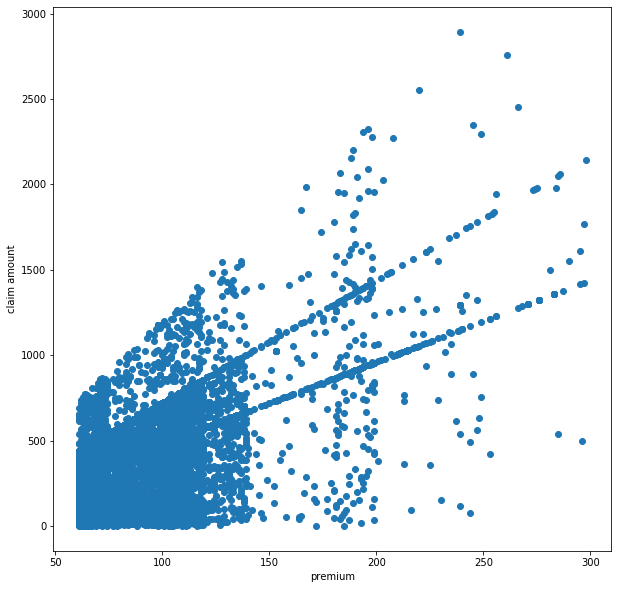

In [174]:
# original scatter
plt.scatter( dfres.premium, dfres.claim )
plt.xlabel('premium')
plt.ylabel('claim amount')

Text(0, 0.5, 'claim amount')

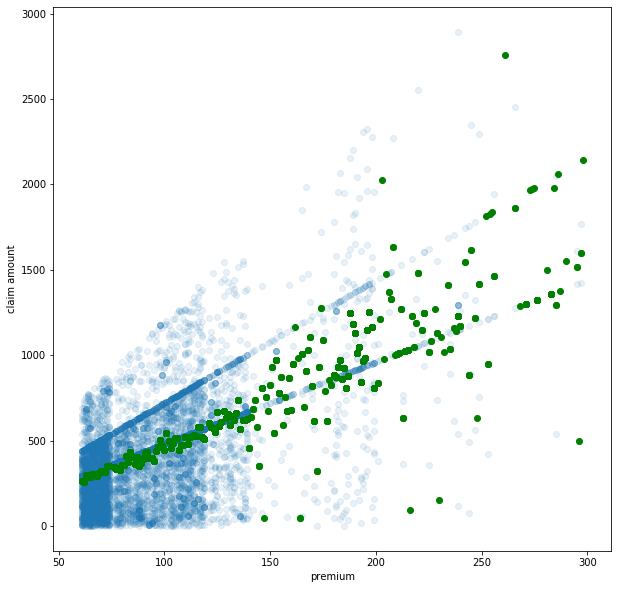

In [201]:
# with quantile regressions
plt.scatter( dfres.premium, dfres.claim, alpha=0.1 )

plt.scatter( dfres.premium, dfres[0.5], c='g' )

plt.xlabel('premium')
plt.ylabel('claim amount')

Text(0, 0.5, 'claim amount')

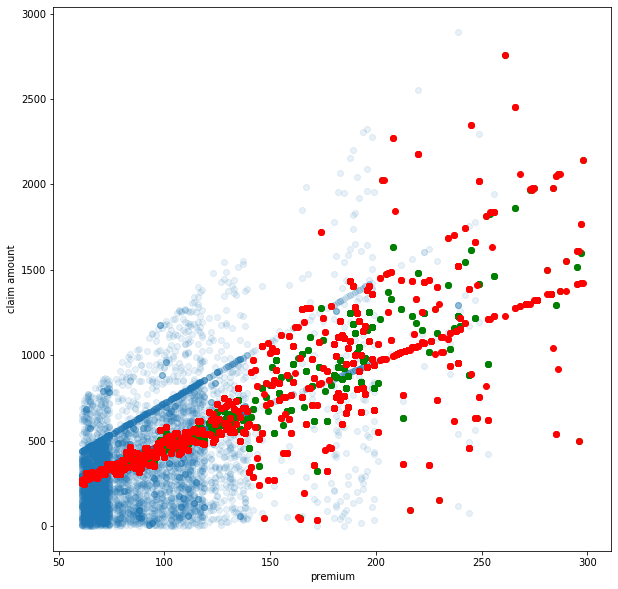

In [200]:
# with quantile regressions
plt.scatter( dfres.premium, dfres.claim, alpha=0.1 )

plt.scatter( dfres.premium, dfres[0.5], c='g' )

plt.scatter( dfres.premium, dfres[0.1], c='r' )
plt.scatter( dfres.premium, dfres[0.9], c='r' )


plt.xlabel('premium')
plt.ylabel('claim amount')